참고 : https://zero-ai.tistory.com/62

In [19]:
import torch

print(f"CUDA 사용 가능 여부: {torch.cuda.is_available()}")
print(f"GPU 이름: {torch.cuda.get_device_name(0)}")
print(f"CUDA 버전: {torch.version.cuda}")
print(f"PyTorch 버전: {torch.version}")
print(f"bf16 지원 여부: {torch.cuda.is_bf16_supported()}")

CUDA 사용 가능 여부: True
GPU 이름: NVIDIA GB10
CUDA 버전: 13.0
PyTorch 버전: <module 'torch.version' from '/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/version.py'>
bf16 지원 여부: True


In [2]:
import zipfile
import os
target_dir_list = ["./3.개방데이터/1.데이터/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/Validation/02.라벨링데이터"]
extract_dir_list = ["./3.개방데이터/1.데이터/extract/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/extract/Validation/02.라벨링데이터", "./3.개방데이터/1.데이터/raw/Training/0.1.원천데이터"]

if not os.path.exists(extract_dir_list[0]):
    os.makedirs(extract_dir_list[0])
if not os.path.exists(extract_dir_list[1]):
    os.makedirs(extract_dir_list[1])

for target_dir, extract_dir in zip(target_dir_list, extract_dir_list):
    for file in os.listdir(target_dir):
        if file.endswith(".zip"):
            file_path = os.path.join(target_dir, file)

            try :
                with zipfile.ZipFile(file_path, "r") as zip_ref:
                    zip_ref.extractall(extract_dir)
                    print(f"O : 성공 : {file}")
            except zipfile.BadZipFile :
                file_size = os.path.getsize(file_path)
                print(f"X : 실패 (파일 깨짐): {file} (크기: {file_size} bytes)")
        
            except Exception as e:
                print(f"기타 에러 ({file}): {e}")

O : 성공 : TL_10.개인정보.ICT.zip
O : 성공 : TL_05.행정.zip
X : 실패 (파일 깨짐): TL_01.민사.zip (크기: 18409624 bytes)
O : 성공 : TL_06.기업.zip
O : 성공 : TL_02.가사.zip
O : 성공 : TL_04.형사B(일반형).zip
O : 성공 : TL_08.특허.저작권.zip
O : 성공 : TL_07.근로자.zip
O : 성공 : TL_09.금융조세.zip
O : 성공 : TL_03.형사A(생활형).zip
O : 성공 : VL_02.가사.zip
O : 성공 : VL_10.개인정보.ICT.zip
O : 성공 : VL_07.근로자.zip
O : 성공 : VL_09.금융조세.zip
O : 성공 : VL_05.행정.zip
O : 성공 : VL_08.특허.저작권.zip
O : 성공 : VL_03.형사A(생활형).zip
O : 성공 : VL_01.민사.zip
O : 성공 : VL_04.형사B(일반형).zip
O : 성공 : VL_06.기업.zip


In [3]:
raw_dir_list = ["./3.개방데이터/1.데이터/Training/01.원천데이터"]

if not os.path.exists(raw_dir_list[0]):
    os.makedirs(raw_dir_list[0])

for file in os.listdir(raw_dir_list[0]):
    if file.endswith(".zip"):
        file_path = os.path.join(raw_dir_list[0], file)

        try :
            with zipfile.ZipFile(file_path, "r") as zip_ref:
                zip_ref.extractall(extract_dir_list[2])
                print(f"O : 성공 : {file}")
        except zipfile.BadZipFile :
            file_size = os.path.getsize(file_path)
            print(f"X : 실패 (파일 깨짐): {file} (크기: {file_size} bytes)")
    
        except Exception as e:
            print(f"기타 에러 ({file}): {e}")

O : 성공 : 01.원천데이터\TS_1.판례_10.개인정보.ICT.zip
O : 성공 : 01.원천데이터\TS_2.심결례_10.개인정보.ICT.zip
O : 성공 : 01.원천데이터\TS_2.심결례_06.기업.zip
O : 성공 : 01.원천데이터\TS_1.판례_05.행정.zip
O : 성공 : 01.원천데이터\TS_2.심결례_05.행정.zip
O : 성공 : 01.원천데이터\TS_2.심결례_09.금융조세.zip
O : 성공 : 01.원천데이터\TS_2.심결례_04.형사B(일반형).zip
O : 성공 : 01.원천데이터\TS_1.판례_02.가사.zip
O : 성공 : 01.원천데이터\TS_2.심결례_07.근로자.zip
O : 성공 : 01.원천데이터\TS_2.심결례_08.특허.저작권.zip
O : 성공 : 01.원천데이터\TS_1.판례_09.금융조세.zip
O : 성공 : 01.원천데이터\TS_1.판례_07.근로자.zip
O : 성공 : 01.원천데이터\TS_1.판례_08.특허.저작권.zip
O : 성공 : 01.원천데이터\TS_1.판례_03.형사A(생활형).zip
O : 성공 : 01.원천데이터\TS_2.심결례_01.민사.zip
O : 성공 : 01.원천데이터\TS_1.판례_06.기업.zip
O : 성공 : 01.원천데이터\TS_1.판례_04.형사B(일반형).zip
O : 성공 : 01.원천데이터\TS_1.판례_01.민사.zip


In [2]:
# 1. 데이터 셋 전처리

import json, os
from datasets import Dataset

def load_json_files(dir) :
    loaded_data = []
    for filename in os.listdir(dir) :
        if filename.endswith('.json') :
            with open(os.path.join(dir, filename), 'r', encoding='utf-8') as f :
                loaded_data.append(json.load(f))
    
    return loaded_data

def create_dataset(data) :
    dataset_dict = {
        "id": [],
        "question": [],
        "context": [],
        "summary": [],
        "answer" : [],
    }

    for item in data:
        dataset_dict["id"].append(item["info"]["id"])
        dataset_dict["question"].append(item["jdgmnInfo"][0]["question"])
        dataset_dict["context"].append(item["Summary"][0]["summ_contxt"])
        dataset_dict["summary"].append(item["Summary"][0]["summ_pass"])
        dataset_dict["answer"].append(item["jdgmnInfo"][0]["answer"])

    return Dataset.from_dict(dataset_dict)

In [3]:
extract_dir_list = ["./3.개방데이터/1.데이터/extract/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/extract/Validation/02.라벨링데이터", "./3.개방데이터/1.데이터/raw/Training/0.1.원천데이터"]
train_data, val_data = load_json_files(extract_dir_list[0]), load_json_files(extract_dir_list[1])

In [4]:
# 일부 데이터 셋으로 테스트
train_dataset = create_dataset(train_data)
val_dataset = create_dataset(val_data)

seed = 42

train_subset = train_dataset.shuffle(seed=seed).select(range(1000))
val_subset = val_dataset.shuffle(seed=seed).select(range(400))
test_subset = val_dataset.shuffle(seed=seed).select(range(401, 601))

print(f"{len(train_subset)} || {len(val_subset)} || {len(test_subset)}")

1000 || 400 || 200


In [5]:
# 2. 학습 시킬 모델 불러오기

from transformers import (
    AutoTokenizer, 
    AutoModelForCausalLM,
    BitsAndBytesConfig, 
    TrainingArguments,
)
from datasets import Dataset
import os, torch, json, wandb, subprocess
from sklearn.model_selection import train_test_split
import torch.nn as nn
from peft import (
    get_peft_model,
    LoraConfig, 
    TaskType,
    prepare_model_for_kbit_training
)

In [6]:
# 양자화 설정
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 모델 가중치를 4bit로 불러오기
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4d
)

In [23]:
# 모델 및 토크나이저 불러오기

model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map={"": torch.cuda.current_device()}
)
tokenizer = AutoTokenizer.from_pretrained(model_id)

print(model)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

ExaoneForCausalLM(
  (transformer): ExaoneModel(
    (wte): Embedding(102400, 4096, padding_idx=0)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-31): 32 x ExaoneBlock(
        (ln_1): ExaoneRMSNorm()
        (attn): ExaoneAttention(
          (attention): ExaoneSdpaAttention(
            (rotary): ExaoneRotaryEmbedding()
            (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
            (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
            (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
            (out_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          )
        )
        (ln_2): ExaoneRMSNorm()
        (mlp): ExaoneGatedMLP(
          (c_fc_0): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (c_fc_1): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (c_proj): Linear4bit(in_features=14336, out_features=4096, bias=

In [26]:
# LoRA를 붙힐 레이어의 명칭을 찾아주는 코드

def find_all_linear_names(model):
    lora_module_names = set()
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            names = name.split('.')
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])
    if 'lm_head' in lora_module_names:
        lora_module_names.remove('lm_head')
    return list(lora_module_names)
 
modules = find_all_linear_names(model)
print(modules)

['k_proj', 'c_fc_1', 'c_fc_0', 'out_proj', 'q_proj', 'v_proj', 'c_proj']


In [27]:
# 어떤 부분을 학습하냐에 따라서도 결과 값이 달라짐
modules = ["q_proj", "k_proj", "v_proj", "out_proj"]

# 변경 가능한 파라미터들
peft_config = LoraConfig(
    task_type="CAUSAL_LM", #CAUSAL_LM, FEATURE_EXTRACTION, QUESTION_ANS, SEQ_2_SEQ_LM, SEQ_CLS, TOKEN_CLS.
    inference_mode=False, # 학습 중에는 False로 두어야 가중치 업데이트 가능
    r=16, # r은 보통 2의 배수로 두는데, r이 클수록 학습 가능한 파라미터의 수가 더 많아짐
    lora_alpha=16,
    lora_dropout=0.05,
    target_modules=modules
)

print(peft_config)

LoraConfig(peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, task_type='CAUSAL_LM', inference_mode=False, r=16, target_modules={'out_proj', 'k_proj', 'q_proj', 'v_proj'}, lora_alpha=16, lora_dropout=0.05, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', loftq_config={}, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False))


In [28]:
# 전체 파라미터 중 일부만 업데이트 되는 것을 확인할 수 있음

model = prepare_model_for_kbit_training(model) # 양자화된 모델을 학습 가능한 상태로 준비시킴
model = get_peft_model(model, peft_config) # 실제 PEFT 구조를 모델에 입힘
model.print_trainable_parameters()

trainable params: 13,631,488 || all params: 7,832,080,384 || trainable%: 0.1740


In [11]:
print(train_subset[0])
print(train_subset[1])
print(train_subset[2])

{'id': 41000982, 'question': '입찰에서 관련 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 된다는 점에서 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당한가?', 'context': '<!--각주-->18) 입찰 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 되므로, 입찰에서 관련시장은 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당하다.\n19) 피심인 한진의 석○○ 차장은 “적격심사제의 특성상 합의에 참여하지 않은 경쟁자들의 존재로 인해 낙찰은 담보되어 있지 않았지만, 최대한 협조사들을 동원하여 당사 판단 하에 낙찰 가능성이 가장 높은 투찰가격을 당사에게 배분하고 당사보다는 높은 가격이지만 그 다음으로 낙찰가능성이 있는 가격을 순차적으로 다른 들러리사에게 배분하여 투찰하도록 함으로써 당사의 낙찰 확률을 높일 목적으로 합의를 하였습니다.”라고 진술하였다(소갑 제7호증 참조).', 'summary': '입찰 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 되므로, 입찰에서 관련시장은 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당하다.', 'answer': '긍정'}
{'id': 43014283, 'question': '미성년자를 약취한 후 강간 목적으로 상해 등을 가하고 나아가 강간 및 살인미수를 범한 경우, 약취한 미성년자에 대한 상해 등으로 인한 특정범죄 가중처벌 등에 관한 법률 위반죄와 미성년자에 대한 강간 및 살인미수행위로 인한 성폭력범죄의 처벌 등에 관한 특례법 위반죄는 서로 실체적 경합범 관계에 있는가?', 'context': '미성년자인 피해자를 약취한 후에 강간을 목적으로 피해자에게 가혹한 행위 및 상해를 가하고 나아가 그 피해자에 대한 

In [29]:
def generate_prompts(examples):
    prompt_list = []
    system_message = (
        "당신은 법률 전문가입니다. 주어진 [근거 문맥]만을 바탕으로 사용자의 질문에 답하십시오. "
        "답변은 반드시 '긍정', '부정', '불명' 중 하나로 결론을 내린 뒤, 그 이유를 설명해야 합니다."
    )

    for i in range(len(examples['question'])):
        # 각 리스트에서 i번째 데이터를 추출합니다.
        answer = str(examples["answer"][i]).strip()
        question = examples["question"][i]
        context = examples["context"][i]
        summary = examples["summary"][i]

        # 사용자님의 정답 생성 로직
        if answer == "긍정":
            target_answer = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
        elif answer == "부정":
            target_answer = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
        elif answer == "불명":
            target_answer = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."
        else:
            target_answer = f"해당 사안에 대해서는 제공된 근거({summary})를 바탕으로 판단이 필요합니다."

        user_content = (
            f"### [근거 문맥]\n{context}\n\n"
            f"### [사용자 질문]\n{question}\n\n"
            f"### [지시 사항]\n"
            f"1. 문맥을 바탕으로 긍정/부정/불명을 판단할 것.\n"
            f"2. 3문단 이내로 답변할 것.\n"
            f"3. 답변 끝에 지시 사항을 반복하지 말 것."
        )

        # 채팅 템플릿 구성
        messages = [
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_content},
            {"role": "assistant", "content": target_answer}
        ]

        full_prompt = tokenizer.apply_chat_template(
            messages, 
            tokenize=False, 
            add_generation_prompt=False
        )
        
        prompt_list.append(full_prompt)
    
    return prompt_list

In [30]:
# max_length 결정 (GPU Util을 최적화 하기 위함)

def generate_prompts_test(example) :
    system_message = (
        "당신은 법률 전문가입니다. 주어진 [근거 문맥]만을 바탕으로 사용자의 질문에 답하십시오. "
        "답변은 반드시 '긍정', '부정', '불명' 중 하나로 결론을 내린 뒤, 그 이유를 설명해야 합니다."
    )

    answer = str(example["answer"]).strip()
    question = example["question"]
    context = example["context"]
    summary = example["summary"]

    if answer == "긍정" :
        target_answer = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
    elif answer == "부정" :
        target_answer = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
    elif answer == "불명" :
        target_answer = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."
    else :
        target_answer = f"해당 사안에 대해서는 제공된 근거({summary})를 바탕으로 판단이 필요합니다."

    user_content = (
            f"### [근거 문맥]\n{context}\n\n"
            f"### [사용자 질문]\n{question}\n\n"
            f"### [지시 사항]\n"
            f"1. 문맥을 바탕으로 긍정/부정/불명을 판단할 것.\n"
            f"2. 3문단 이내로 답변할 것.\n"
            f"3. 답변 끝에 지시 사항을 반복하지 말 것."
        )

    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_content},
        {"role": "assistant", "content": target_answer}
    ]

    full_prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=False)
    
    return {"text": full_prompt}

train_prompts, val_prompts = train_subset.map(generate_prompts_test), val_subset.map(generate_prompts_test)

import numpy as np

token_lengths = [len(tokenizer.encode(p["text"])) for p in train_prompts] + [len(tokenizer.encode(p["text"])) for p in val_prompts]

print(f"최대 토큰 길이: {np.max(token_lengths)}")
print(f"평균 토큰 길이: {np.mean(token_lengths):.2f}")
print(f"95번째 백분위수 (P95): {np.percentile(token_lengths, 95)}")
print(f"99번째 백분위수 (P99): {np.percentile(token_lengths, 99)}")

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

최대 토큰 길이: 1282
평균 토큰 길이: 575.02
95번째 백분위수 (P95): 875.0
99번째 백분위수 (P99): 1027.02


In [31]:
# 학습을 기록할 wanDB notebook 설정

import os
from datetime import datetime

wandb.finish()

os.environ["WANDB_PROJECT"] = "PromptTuning" # 프로젝트 이름
os.environ["WANDB_RUN_ID"] = "legal_testv4" # 노트북 고유 ID
os.environ["WANDB_RESUME"] = "allow" # 해당 노트북에서 학습을 이어서 진행할 것인지

wandb.init(
    project=os.environ["WANDB_PROJECT"],
    id=os.environ["WANDB_RUN_ID"],
    resume=os.environ["WANDB_RESUME"],
    name=datetime.now().strftime("%Y-%m-%d %H:%M:%S") # 대시보드에 표시될 이름
)

eval/loss,0.09055
eval/runtime,136.9999
eval/samples_per_second,2.92
eval/steps_per_second,1.46
total_flos,254149880146624500
train/epoch,9.96
train/global_step,620
train/grad_norm,0.48529
train/learning_rate,0.0
train/loss,0.0677
+4,...


In [32]:
# 먼저 1 epoch로 훈련 -> 추론이 잘 이루어지는지 확인
# 이후 epoch를 늘려 과적합이 일어날 때 까지 학습하는 것이 좋음

from trl import SFTTrainer, SFTConfig, DataCollatorForCompletionOnlyLM # 오직 답변 부분에 대해서만 손실 계산
from datetime import datetime

response_template = "[|assistant|]" # EXAONE 기준 response_template
data_collator = DataCollatorForCompletionOnlyLM(
    response_template=response_template, 
    tokenizer=tokenizer
)

training_args = SFTConfig(
    output_dir="./SFT2",
    save_strategy="steps",
    save_steps=50,
    eval_strategy="steps",
    eval_steps=50,
    max_seq_length=1024,
    num_train_epochs=10,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=8,
    load_best_model_at_end=True,
    optim="paged_adamw_32bit", # 일반적으로 adam 계열 사용, paged_adamw_32bit는 GPU 메모리 부담을 줄이기 위해 CPU 메모리르 확장 사용 기법
    logging_dir="./logs",
    logging_steps=11,
    warmup_steps=10, # 0부터 목표 lr까지 선형적으로 늘리는 steps 기간 결정 (학습 초기에 큰 lr을 사용하면 발산할 수 있기 때문)
    logging_strategy="steps",
    learning_rate=5e-5,
    group_by_length=True, # 길이가 비슷한 샘플을 함께 배치 함으로써 메모리 사용 최적화
    bf16=True,
    fp16=False,
    report_to="wandb",
    run_name=f"{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}"
)

trainer = SFTTrainer(
    model=model,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    args=training_args,
    data_collator=data_collator,
    formatting_func=generate_prompts,
)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [33]:
import torch
from functools import partial

# PyTorch 2.6 이상 버전에서 trainer.train(resume_from_checkpoint=True)을 하고 싶다면 해주어야 함
# torch.load의 기본값을 weights_only=False로 수정
torch.load = partial(torch.load, weights_only=False)

final_save_path = "./SFT2/final"
os.makedirs(final_save_path, exist_ok=True)
trainer.train()
# trainer.train(resume_from_checkpoint=True) # 이어서 학습을 진행하고 싶은 경우, 가장 마지막 checkpoint-XX를 불러와서 학습이 진행된다

trainer.save_model(final_save_path)
tokenizer.save_pretrained(final_save_path)
wandb.finish()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:1227: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


KeyboardInterrupt: 

In [ ]:
# 3. 추론된 모델 확인
# 중요!!! 학습 이후 커널을 내리고 다시 올려야 파인튜닝된 가중치를 모델에 올릴 수 있음

In [1]:
from transformers import (
    AutoTokenizer, 
    AutoModelForCausalLM,
    BitsAndBytesConfig, 
    TrainingArguments,
)
from datasets import Dataset
import os, torch, json, wandb, subprocess
from sklearn.model_selection import train_test_split
import torch.nn as nn
from peft import (
    get_peft_model,
    LoraConfig, 
    TaskType,
    prepare_model_for_kbit_training
)

In [2]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit 할 것이냐
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4
)

In [3]:
# 모델 및 토크나이저 불러오기

from peft import PeftModel

model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map="auto"
)

/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/cuda/__init__.py:435: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  queued_call()


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
adapter_path = "./SFT2/final"
model = PeftModel.from_pretrained(model, adapter_path) # 학습된 LoRA Config를 씌운다
model.eval() # 추론 모드로 모델을 바꾼다

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): ExaoneForCausalLM(
      (transformer): ExaoneModel(
        (wte): Embedding(102400, 4096, padding_idx=0)
        (drop): Dropout(p=0.0, inplace=False)
        (h): ModuleList(
          (0-31): 32 x ExaoneBlock(
            (ln_1): ExaoneRMSNorm()
            (attn): ExaoneAttention(
              (attention): ExaoneSdpaAttention(
                (rotary): ExaoneRotaryEmbedding()
                (k_proj): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=4096, out_features=1024, bias=False)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=4096, out_features=16, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=16, out_features=1024, bias=False)
                  )


In [5]:
import json, os
from datasets import Dataset

def load_json_files(dir) :
    loaded_data = []
    for filename in os.listdir(dir) :
        if filename.endswith('.json') :
            with open(os.path.join(dir, filename), 'r', encoding='utf-8') as f :
                loaded_data.append(json.load(f))
    
    return loaded_data

def create_dataset(data) :
    dataset_dict = {
        "id": [],
        "question": [],
        "context": [],
        "summary": [],
        "answer" : [],
    }

    for item in data:
        dataset_dict["id"].append(item["info"]["id"])
        dataset_dict["question"].append(item["jdgmnInfo"][0]["question"])
        dataset_dict["context"].append(item["Summary"][0]["summ_contxt"])
        dataset_dict["summary"].append(item["Summary"][0]["summ_pass"])
        dataset_dict["answer"].append(item["jdgmnInfo"][0]["answer"])

    return Dataset.from_dict(dataset_dict)
    
extract_dir_list = ["./3.개방데이터/1.데이터/extract/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/extract/Validation/02.라벨링데이터", "./3.개방데이터/1.데이터/raw/Training/0.1.원천데이터"]
train_data, val_data = load_json_files(extract_dir_list[0]), load_json_files(extract_dir_list[1])

train_dataset = create_dataset(train_data)
val_dataset = create_dataset(val_data)

seed = 42

train_subset = train_dataset.shuffle(seed=seed).select(range(1000))
val_subset = val_dataset.shuffle(seed=seed).select(range(400))
test_subset = val_dataset.shuffle(seed=seed).select(range(401, 601))

print(f"{len(train_subset)} || {len(val_subset)} || {len(test_subset)}")

1000 || 400 || 200


In [6]:
print(test_subset[0])

{'id': 41036985, 'question': '피신청인들이 제출한 자료만으로, 이 사건 처분의 효력을 정지시킬 경우 위와 같이 공익에 중대한 해를 입힐 우려가 있다고 보기 부족하고, 더욱이 국정교과서 교육의 위헌·위법성 또는 이 사건 처분의 위법성이 추후 확인될 경우, 잘못된 국정교과서로 한국사를 배운 학생들 및 그들의 학부모가 침해당할 학습권, 자녀교육권과 비교형량하여 볼 때, 피신청인이 내세우는 공공의 복리란 것이 더 중대하다고도 볼 수 있는가?', 'context': '피신청인은 이 사건 처분이 이 사건 학교를 연구학교로 지정하여 이 사건 국정교과서의 교육효과를 연구·개발·검증하기 위한 것이고, 이 사건 학교는 전국에 유일한 이 사건 국정교과서의 연구학교로서 이 사건 처분의 효력이 정지되는 경우 국가의 교육정책에 막대한 장애가 발생하여 공공의 복리에 중대한 영향이 있다고 주장한다. 그러나 집행정지의 장애사유로서의 ‘공공복리에 대한 중대한 영향을 미칠 우려’란 그와 같은 일반적·추상적인 공익에 대한 침해의 우려가 아니라 당해 처분의 효력정지로 말미암아 구체적이고도 개별적으로 공익에 중대한 해를 입힐 우려가 높은 경우를 말하는바, 피신청인들이 제출한 자료만으로, 이 사건 처분의 효력을 정지시킬 경우 위와 같이 공익에 중대한 해를 입힐 우려가 있다고 보기 부족하다. 더욱이 국정교과서 교육의 위헌·위법성 또는 이 사건 처분의 위법성이 추후 확인될 경우, 잘못된 국정교과서로 한국사를 배운 학생들 및 그들의 학부모가 침해당할 학습권, 자녀교육권과 비교형량하여 보더라도 피신청인이 내세우는 공공의 복리란 것이 더 중대하다고도 볼 수 없다.', 'summary': '집행정지의 장애사유로서의 ‘공공복리에 대한 중대한 영향을 미칠 우려’란 그와 같은 일반적·추상적인 공익에 대한 침해의 우려가 아니라 당해 처분의 효력정지로 말미암아 구체적이고도 개별적으로 공익에 중대한 해를 입힐 우려가 높은 경우를 말하는바, 피신청인들이 제출한 자료만으로, 이 사건 처분의 효력을 정지

In [7]:
def generate_legal_answer(question):
    system_message = (
        "당신은 법률 전문가입니다. 주어진 [근거 문맥]만을 바탕으로 사용자의 질문에 답하십시오. "
        "답변은 반드시 '긍정', '부정', '불명' 중 하나로 결론을 내린 뒤, 그 이유를 설명해야 합니다."
    )
    # 학습 때와 동일한 구조를 유지하되 문맥 부분만 비웁니다.
    user_content = (
        f"### [근거 문맥]\n(제공된 문맥이 없습니다.)\n\n"
        f"### [사용자 질문]\n{question}\n\n"
        f"### [지시 사항]\n"
        f"1. 문맥을 바탕으로 긍정/부정/불명을 판단할 것.\n"
        f"2. 3문단 이내로 답변할 것.\n"
        f"3. 답변 끝에 지시 사항을 반복하지 말 것."
    )
    
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_content},
    ]

    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt",
    ).to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids,
            max_new_tokens=1024,
            do_sample=False, # 비교를 위해 결정론적 생성
            repetition_penalty=1.1,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )

    response = tokenizer.decode(outputs[0][input_ids.shape[-1]:], skip_special_tokens=True)
    return response.strip()

검증 및 비교 시작... 총 200개 데이터


Evaluating: 100%|█████████████████████████████████████████████████████████████████| 200/200 [09:17<00:00,  2.79s/it]


[최종 검증 요약]
- Label Accuracy: 67.50%
- ROUGE-L: 0.1204
- BLEU: 0.1901

[상세 분류 리포트]
              precision    recall  f1-score   support

          긍정       0.72      0.77      0.74       119
          부정       0.60      0.58      0.59        74
          불명       0.00      0.00      0.00         7
          실패       0.00      0.00      0.00         0

    accuracy                           0.68       200
   macro avg       0.33      0.34      0.33       200
weighted avg       0.65      0.68      0.66       200

검증 완료! 로그 파일: ./result2/log_without_context.txt



/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

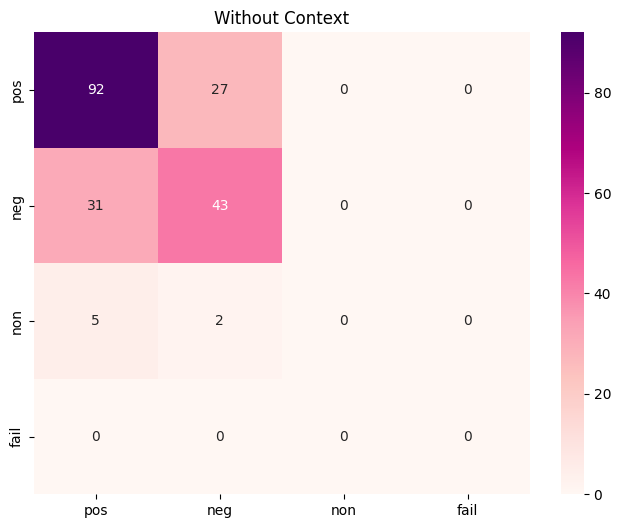

In [9]:
# 유저가 Context를 주지 않을 경우

import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from difflib import SequenceMatcher # 텍스트간 유사도 측정 라이브러리
from sklearn.metrics import confusion_matrix, classification_report
import evaluate  # Hugging Face evaluate 라이브러리

# 1. 지표 로더
rouge_metric = evaluate.load("rouge")
bleu_metric = evaluate.load("bleu")

# 2. 결과 파일 및 통계 초기화
output_file_path = "./result2/log_without_context.txt"
os.makedirs("./result2", exist_ok=True)

all_preds_text = []    # ROUGE/BLEU용 모델 답변
all_refs_text = []     # ROUGE/BLEU용 실제 정답
y_true_idx = []        # 혼동행렬용 실제 라벨
y_pred_idx = []        # 혼동행렬용 예측 라벨

label_map = {"긍정": 0, "부정": 1, "불명": 2}
correct_labels = 0
total_samples = len(test_subset)

print(f"검증 및 비교 시작... 총 {total_samples}개 데이터")

with open(output_file_path, "w", encoding="utf-8") as f:
    f.write("=== EXAONE 법률 QA 정답 비교 검증 로그 ===\n\n")

    for i, data in enumerate(tqdm(test_subset, desc="Evaluating")):
        question = data["question"]
        context = data["context"]
        actual_label = str(data["answer"]).strip() # 실제 정답 (긍정/부정/불명)
        summary = data["summary"]
        
        if actual_label == "긍정":
            ground_truth = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
        elif actual_label == "부정":
            ground_truth = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
        else:
            ground_truth = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."

        # 모델 답변 생성
        generated_answer = generate_legal_answer(question)

        actual_idx = label_map.get(actual_label, 3)
        if "네" in generated_answer[:10]: pred_idx = 0
        elif "아니요" in generated_answer[:10]: pred_idx = 1
        elif "확실하지" in generated_answer[:10]: pred_idx = 2
        else: pred_idx = 3 # 분류 실패

        y_true_idx.append(actual_idx)
        y_pred_idx.append(pred_idx)
        if actual_idx == pred_idx: correct_labels += 1

        all_preds_text.append(generated_answer)
        all_refs_text.append(ground_truth)

        similarity = SequenceMatcher(None, ground_truth, generated_answer).ratio()

        # 로그 기록
        f.write(f"[{i+1}번 데이터] | Label 일치: {'O' if actual_idx == pred_idx else 'X'} | 유사도: {similarity:.2f}\n")
        f.write(f"질문: {question}\n")
        f.write(f"실제 정답: {ground_truth}\n")
        f.write(f"모델 답변: {generated_answer}\n")
        f.write("-" * 80 + "\n")

    rouge_results = rouge_metric.compute(predictions=all_preds_text, references=all_refs_text)
    bleu_results = bleu_metric.compute(predictions=all_preds_text, references=all_refs_text)

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_idx, y_pred_idx, labels=[0, 1, 2, 3])
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', 
                xticklabels=["pos", "neg", "non", "fail"], 
                yticklabels=["pos", "neg", "non", "fail"])
    plt.title("Without Context")
    plt.savefig("./result2/confusion_matrix_without_context.png")

    # 5. 최종 통계 기록
    accuracy = (correct_labels / total_samples) * 100
    report = classification_report(y_true_idx, y_pred_idx, 
                                   target_names=['긍정', '부정', '불명', '실패'], labels=[0, 1, 2, 3])
    summary_msg = (
        f"\n[최종 검증 요약]\n"
        f"- Label Accuracy: {accuracy:.2f}%\n"
        f"- ROUGE-L: {rouge_results['rougeL']:.4f}\n"
        f"- BLEU: {bleu_results['bleu']:.4f}\n"
        f"\n[상세 분류 리포트]\n{report}"
    )
    
    print(summary_msg)
    f.write(summary_msg)

print(f"검증 완료! 로그 파일: {output_file_path}")

In [7]:
def generate_legal_answer_with_context(question, context):
    system_message = (
        "당신은 법률 전문가입니다. 주어진 [근거 문맥]만을 바탕으로 사용자의 질문에 답하십시오. "
        "답변은 반드시 '긍정', '부정', '불명' 중 하나로 결론을 내린 뒤, 그 이유를 설명해야 합니다."
    )
    # 학습 시의 user_content와 완벽히 일치해야 합니다.
    user_content = (
        f"### [근거 문맥]\n{context}\n\n"
        f"### [사용자 질문]\n{question}\n\n"
        f"### [지시 사항]\n"
        f"1. 문맥을 바탕으로 긍정/부정/불명을 판단할 것.\n"
        f"2. 3문단 이내로 답변할 것.\n"
        f"3. 답변 끝에 지시 사항을 반복하지 말 것."
    )
    
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_content},
    ]

    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt",
    ).to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids,
            max_new_tokens=1024,
            do_sample=False,
            repetition_penalty=1.1,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )

    response = tokenizer.decode(outputs[0][input_ids.shape[-1]:], skip_special_tokens=True)
    return response.strip()

검증 및 비교 시작... 총 200개 데이터


Evaluating: 100%|███████████████████████████████████████████| 200/200 [13:52<00:00,  4.16s/it]


[최종 검증 요약]
- Label Accuracy: 92.50%
- ROUGE-L: 0.2036
- BLEU: 0.4561

[상세 분류 리포트]
              precision    recall  f1-score   support

          긍정       0.93      0.97      0.95       119
          부정       0.91      0.95      0.93        74
          불명       0.00      0.00      0.00         7
          실패       0.00      0.00      0.00         0

    accuracy                           0.93       200
   macro avg       0.46      0.48      0.47       200
weighted avg       0.89      0.93      0.91       200

검증 완료! 로그 파일: ./result2/log_with_context.txt



/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

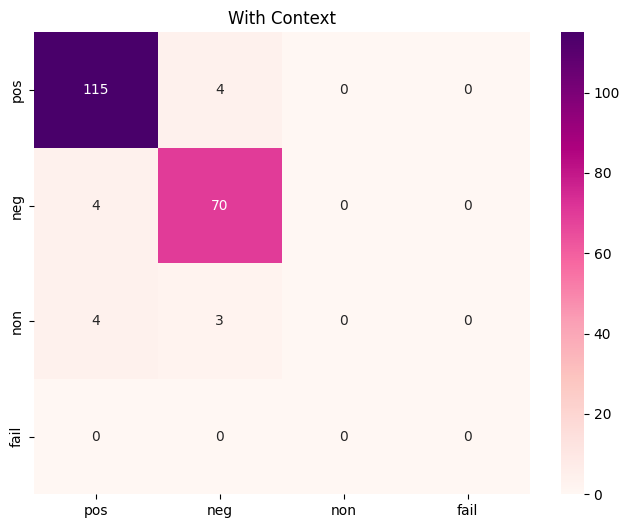

In [8]:
# 유저가 Context를 주는 경우

import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from difflib import SequenceMatcher # 텍스트간 유사도 측정 라이브러리
from sklearn.metrics import confusion_matrix, classification_report
import evaluate  # Hugging Face evaluate 라이브러리

# 1. 지표 로더
rouge_metric = evaluate.load("rouge")
bleu_metric = evaluate.load("bleu")

# 2. 결과 파일 및 통계 초기화
output_file_path = "./result2/log_with_context.txt"
os.makedirs("./result2", exist_ok=True)

all_preds_text = []    # ROUGE/BLEU용 모델 답변
all_refs_text = []     # ROUGE/BLEU용 실제 정답
y_true_idx = []        # 혼동행렬용 실제 라벨
y_pred_idx = []        # 혼동행렬용 예측 라벨

label_map = {"긍정": 0, "부정": 1, "불명": 2}
correct_labels = 0
total_samples = len(test_subset)

print(f"검증 및 비교 시작... 총 {total_samples}개 데이터")

with open(output_file_path, "w", encoding="utf-8") as f:
    f.write("=== EXAONE 법률 QA 정답 비교 검증 로그 ===\n\n")

    for i, data in enumerate(tqdm(test_subset, desc="Evaluating")):
        question = data["question"]
        context = data["context"]
        actual_label = str(data["answer"]).strip() # 실제 정답 (긍정/부정/불명)
        summary = data["summary"]
        
        if actual_label == "긍정":
            ground_truth = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
        elif actual_label == "부정":
            ground_truth = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
        else:
            ground_truth = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."

        # 모델 답변 생성
        generated_answer = generate_legal_answer_with_context(question, context)

        actual_idx = label_map.get(actual_label, 3)
        if "네" in generated_answer[:10]: pred_idx = 0
        elif "아니요" in generated_answer[:10]: pred_idx = 1
        elif "확실하지" in generated_answer[:10]: pred_idx = 2
        else: pred_idx = 3 # 분류 실패

        y_true_idx.append(actual_idx)
        y_pred_idx.append(pred_idx)
        if actual_idx == pred_idx: correct_labels += 1

        all_preds_text.append(generated_answer)
        all_refs_text.append(ground_truth)

        similarity = SequenceMatcher(None, ground_truth, generated_answer).ratio()

        # 로그 기록
        f.write(f"[{i+1}번 데이터] | Label 일치: {'O' if actual_idx == pred_idx else 'X'} | 유사도: {similarity:.2f}\n")
        f.write(f"질문: {question}\n")
        f.write(f"실제 정답: {ground_truth}\n")
        f.write(f"모델 답변: {generated_answer}\n")
        f.write("-" * 80 + "\n")

    rouge_results = rouge_metric.compute(predictions=all_preds_text, references=all_refs_text)
    bleu_results = bleu_metric.compute(predictions=all_preds_text, references=all_refs_text)

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_idx, y_pred_idx, labels=[0, 1, 2, 3])
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', 
                xticklabels=["pos", "neg", "non", "fail"], 
                yticklabels=["pos", "neg", "non", "fail"])
    plt.title("With Context")
    plt.savefig("./result2/confusion_matrix_with_context.png")

    # 5. 최종 통계 기록
    accuracy = (correct_labels / total_samples) * 100
    report = classification_report(y_true_idx, y_pred_idx, 
                                   target_names=['긍정', '부정', '불명', '실패'], labels=[0, 1, 2, 3])
    summary_msg = (
        f"\n[최종 검증 요약]\n"
        f"- Label Accuracy: {accuracy:.2f}%\n"
        f"- ROUGE-L: {rouge_results['rougeL']:.4f}\n"
        f"- BLEU: {bleu_results['bleu']:.4f}\n"
        f"\n[상세 분류 리포트]\n{report}"
    )
    
    print(summary_msg)
    f.write(summary_msg)

print(f"검증 완료! 로그 파일: {output_file_path}")

In [10]:
import re

def count_instruction_leakage(file_path):    
    leakage_count = 0
    total_answers = 0
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            
            # '모델 답변:' 이후부터 다음 구분선(---) 혹은 파일 끝까지의 텍스트를 추출
            model_answers = re.findall(r"모델 답변:\s*(.*?)(?=\n-{10,}|\n===|\Z)", content, re.DOTALL)
            
            total_answers = len(model_answers)
            
            for answer in model_answers:
                # 앞뒤 공백 제거 후 타겟 문구로 끝나는지 확인
                clean_answer = answer.strip()
                if re.search(r"를 참조하여 \d+문단 이내로 답변하세요\.\s*$", clean_answer):
                    leakage_count += 1
                    
        print(f"📊 검증 결과 리포트")
        print(f"----------------------")
        print(f"✅ 전체 모델 답변 수: {total_answers}개")
        print(f"⚠️ 지시 사항 누수 발생: {leakage_count}개")
        
        if total_answers > 0:
            leakage_rate = (leakage_count / total_answers) * 100
            print(f"📈 누수 발생률: {leakage_rate:.2f}%")
            
    except FileNotFoundError:
        print(f"❌ 파일을 찾을 수 없습니다: {file_path}")

count_instruction_leakage("./result2/log_without_context.txt")
print()
count_instruction_leakage("./result2/log_with_context.txt")

📊 검증 결과 리포트
----------------------
✅ 전체 모델 답변 수: 200개
⚠️ 지시 사항 누수 발생: 0개
📈 누수 발생률: 0.00%

📊 검증 결과 리포트
----------------------
✅ 전체 모델 답변 수: 200개
⚠️ 지시 사항 누수 발생: 0개
📈 누수 발생률: 0.00%


In [ ]:
# LoRA 가중치만 upload
from peft import PeftModel
from transformers import (
    AutoTokenizer, 
    AutoModelForCausalLM,
    BitsAndBytesConfig, 
    TrainingArguments,
)
import torch

model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit 할 것이냐
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4
)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map="auto"
)

# 1. 학습 완료 후 저장된 어댑터 경로
adapter_path = "/home/vsc/LLM_TUNE/115.법률-규정 텍스트 분석 데이터_고도화_상황에 따른 판례 데이터/SFT/final"
repo_id = "JungSeong2/QA-Law-Adapter" # 허깅페이스 저장소 이름

# 2. 토크나이저와 어댑터 모델 로드 (또는 학습 중인 trainer.model 사용)
tokenizer = AutoTokenizer.from_pretrained(adapter_path)
model = PeftModel.from_pretrained(model, adapter_path)

# 3. 어댑터 가중치만 업로드
model.push_to_hub(
    repo_id=repo_id,
    commit_message="v2.0: DataCollatorForCompletionOnlyLM + Prompt Engineered",
    revision="v2.0" # v2.0 브랜치에 해당 어댑터를 업로드
)

tokenizer.push_to_hub(
    repo_id,
    commit_message="v2.0: DataCollatorForCompletionOnlyLM + Prompt Engineered",
    revision="v2.0"
)